In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
pd.options.mode.chained_assignment = None # avoid warnings

In [2]:
df = pd.read_csv("car_prices.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [5]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
# Drop unneeded columns that wouldn't play a role in a car's price
df = df.drop(columns=['ID', 'Wheel', 'Color'])

In [7]:
# Mileage values have "km" in them
df['Mileage'] = df['Mileage'].str.extract('(\d+)', expand=False)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,4


In [8]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [9]:
replaceMap = {'04-May': '4', '02-Mar': '2'}
df['Doors'] = df['Doors'].replace(replaceMap)
df['Doors'].unique()

array(['4', '2', '>5'], dtype=object)

In [10]:
df.duplicated().sum()

3522

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15715 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15715 non-null  int64  
 1   Levy              15715 non-null  object 
 2   Manufacturer      15715 non-null  object 
 3   Model             15715 non-null  object 
 4   Prod. year        15715 non-null  int64  
 5   Category          15715 non-null  object 
 6   Leather interior  15715 non-null  object 
 7   Fuel type         15715 non-null  object 
 8   Engine volume     15715 non-null  object 
 9   Mileage           15715 non-null  object 
 10  Cylinders         15715 non-null  float64
 11  Gear box type     15715 non-null  object 
 12  Drive wheels      15715 non-null  object 
 13  Doors             15715 non-null  object 
 14  Airbags           15715 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 1.9+ MB


In [13]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [14]:
replacevalue = {'-':'0'}
df['Levy'] = df['Levy'].replace(replacevalue)

In [15]:
df['Levy'] = df['Levy'].astype(int)
df['Cylinders'] = df['Cylinders'].astype(int) # no need to be float
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Airbags             0
dtype: int64

In [16]:
print(df['Leather interior'].unique())
print(df['Prod. year'].unique())
print(df['Cylinders'].unique())
print(df['Gear box type'].unique())
print(df['Drive wheels'].unique())
print(df['Airbags'].unique())

['Yes' 'No']
[2010 2011 2006 2014 2016 2013 2007 1999 1997 2018 2008 2012 2017 2001
 1995 2009 2000 2019 2015 2004 1998 1990 2005 2003 1985 1996 2002 1993
 1992 1988 1977 1989 1994 2020 1984 1986 1991 1983 1953 1964 1974 1987
 1943 1978 1965 1976 1957 1980 1939 1968 1947 1982 1981 1973]
[ 6  4  8  1 12  3  2 16  5  7  9 10 14]
['Automatic' 'Tiptronic' 'Variator' 'Manual']
['4x4' 'Front' 'Rear']
[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]


In [17]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [18]:
def countBar(df, column):
    categoryCounts = df[column].value_counts()
    plt.figure(figsize=(12, 6))
    categoryCounts.plot(kind='bar', color='blue')
    plt.title('Distribution of Input')
    plt.xlabel('Input')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

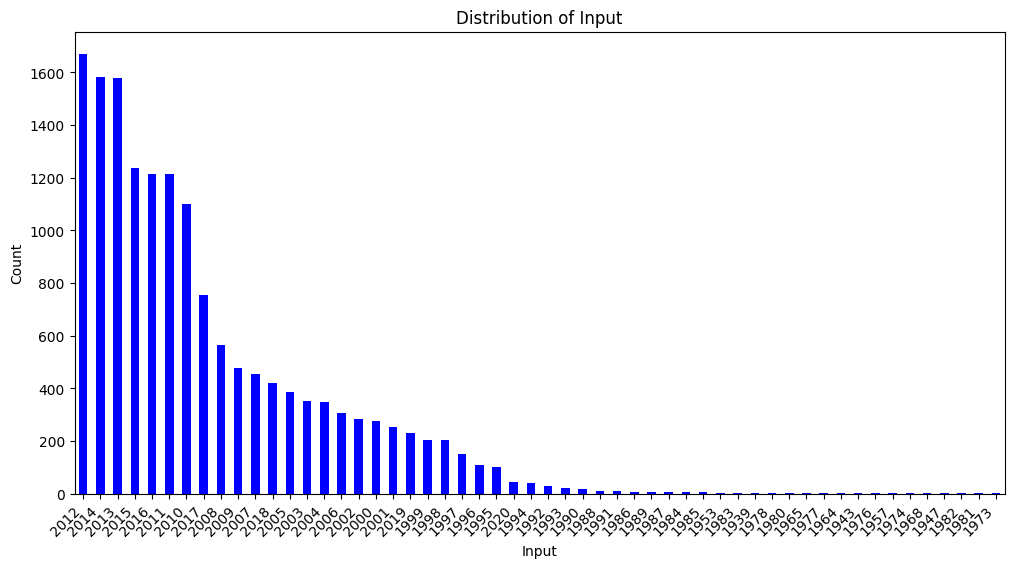

None


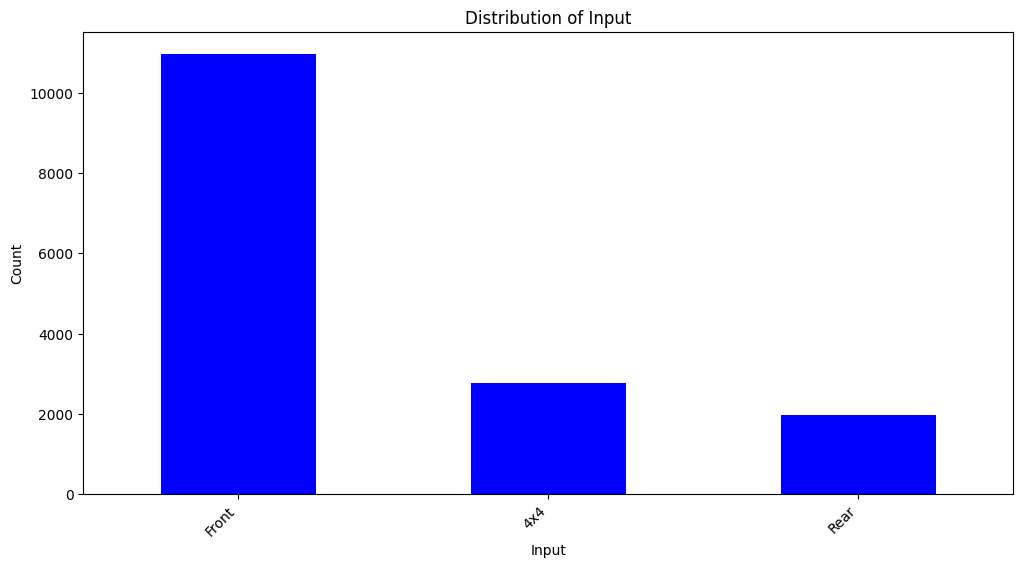

None


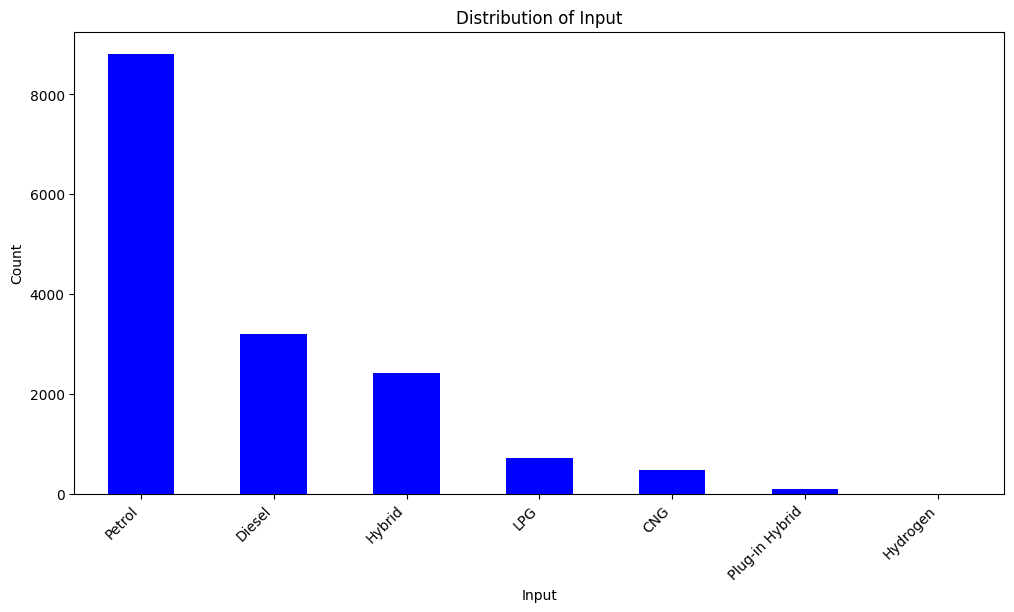

None


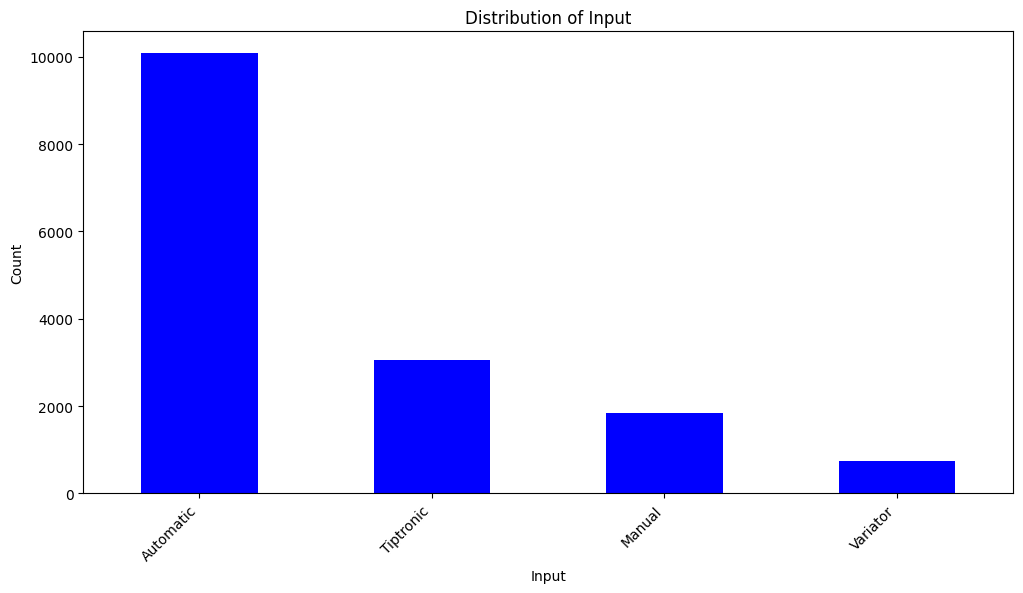

None


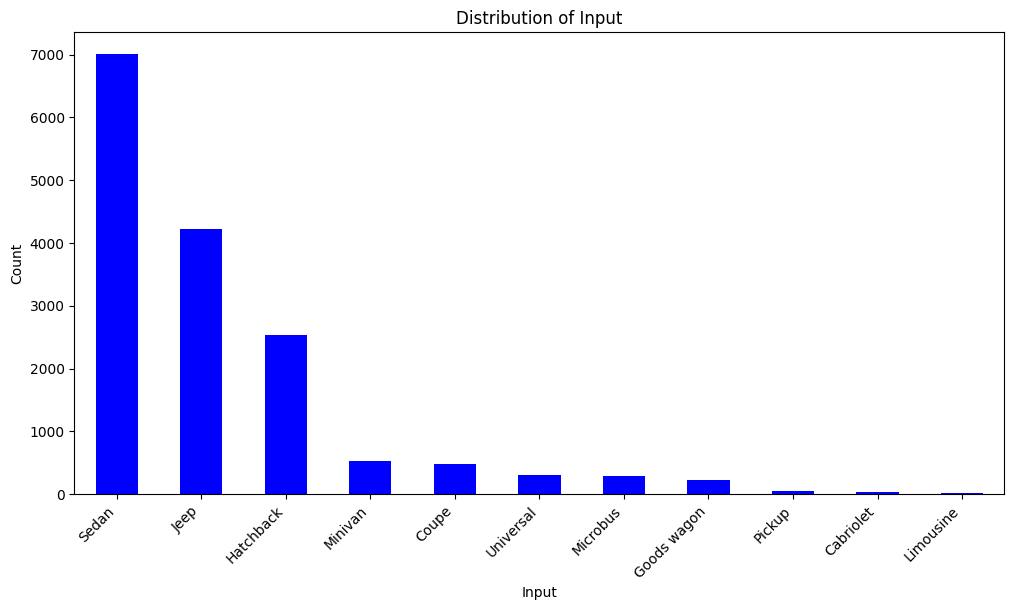

None


In [19]:
print(countBar(df, 'Prod. year'))
print(countBar(df, 'Drive wheels'))
print(countBar(df, 'Fuel type'))
print(countBar(df, 'Gear box type'))
print(countBar(df, 'Category'))

In [20]:
df2 = pd.read_csv("Sport car price.csv")
df2

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [21]:
dropColumns = ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']
df2.drop(columns=dropColumns, inplace=True)
df2['Doors'] = '2' # almost all sports cars have 2 doors only
df2

,Car Make,Car Model,Year,Engine Size (L),Price (in USD),Doors
0,Porsche,911,2022,3,"101,200",2
1,Lamborghini,Huracan,2021,5.2,"274,390",2
2,Ferrari,488 GTB,2022,3.9,"333,750",2
3,Audi,R8,2022,5.2,"142,700",2
4,McLaren,720S,2021,4,"298,000",2
...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,"3,000,000",2
1003,Lotus,Evija,2021,Electric Motor,"2,000,000",2
1004,McLaren,Senna,2021,4,"1,000,000",2
1005,Pagani,Huayra,2021,6,"2,600,000",2


In [22]:
df2.isnull().sum()

Car Make            0
Car Model           0
Year                0
Engine Size (L)    10
Price (in USD)      0
Doors               0
dtype: int64

In [23]:
nullMask = df2.isnull().any(axis=1)
nullRows = df2[nullMask]
nullRows

,Car Make,Car Model,Year,Engine Size (L),Price (in USD),Doors
168,Rimac,C_Two,2022,NaN,"2,400,000",2
171,Tesla,Model S Plaid,2021,NaN,"131,190",2
222,Porsche,Taycan Turbo S,2021,NaN,"185,000",2
247,Tesla,Model S Plaid,2022,NaN,"131,190",2
387,Rimac,C_Two,2022,NaN,"2,400,000",2
389,Tesla,Roadster,2022,NaN,"200,000",2
686,Rimac,C_Two,2022,NaN,"2,400,000",2
697,Lotus,Evija,2022,NaN,"2,700,000",2
752,Porsche,Taycan,2022,NaN,"79,900",2
916,Tesla,Roadster,2022,NaN,"200,000",2


In [24]:
# Null rows are electric cars, because they don't have a litre size
df2['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [25]:
replacementMap = {
    'Electric Motor': 'Electric',
    np.nan: 'Electric',
    '-': 'Electric',
    'Electric (tri-motor)': 'Electric',
    'Electric (93 kWh)': 'Electric',
    'Electric (100 kWh)': 'Electric',
    '2.0 (Electric)': 'Electric',
    '0': 'Electric',
    '1.5 + Electric': 'Hybrid',
    'Hybrid (4.0)': 'Hybrid',
    '4.0 (Hybrid)': 'Hybrid'
}

df2['Engine Size (L)'] = df2['Engine Size (L)'].replace(replacementMap)
df2['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', '2.5', 'Hybrid',
       '6.8', '8.4', '6.6', '7', '1.7', '3.3', '6.7', '1.8', '5.5', '4.6',
       '3.6', '1.5', '5.7', '6.4', '6.3', '2.3'], dtype=object)

In [26]:
df2['Price (in USD)'] = df2['Price (in USD)'].str.replace(',', '')
df2.rename(columns={
    'Car Make': 'Manufacturer',
    'Car Model': 'Model',
    'Year': 'Prod. year',
    'Engine Size (L)': 'Engine volume',
    'Price (in USD)': 'Price'
}, inplace=True)

In [27]:
df2.duplicated().sum()

421

In [28]:
df2 = df2.drop_duplicates()

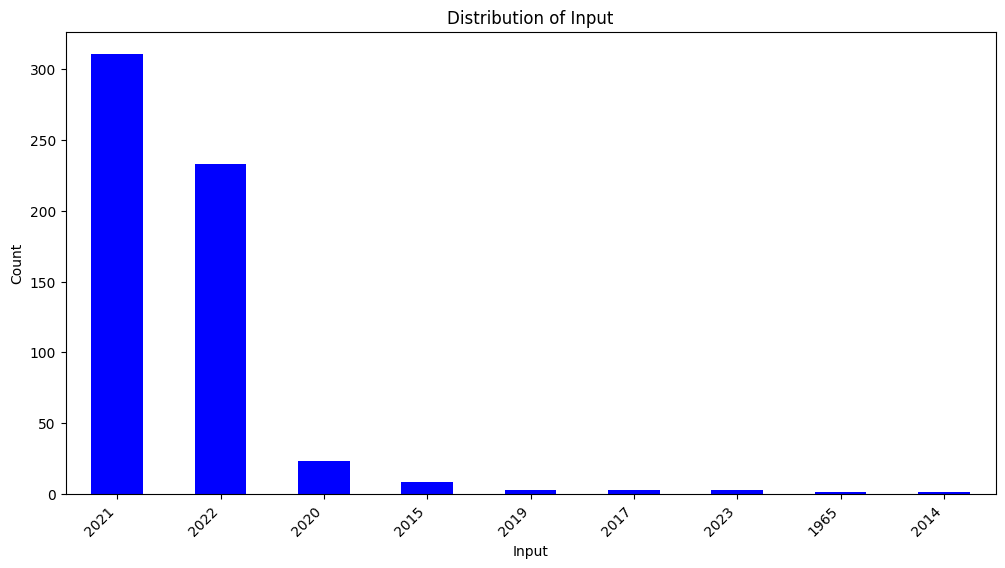

In [29]:
countBar(df2, 'Prod. year')

In [30]:
# Since most of the cars in this dataset are 2021-2022, we will treat the entire dataset as a "modern sports car"
df2['Category'] = 'Sport'
df2['Leather interior'] = 'Yes' # Most sports cars are luxury and have leather interior
df2['Mileage'] = '0' # Dataset seems to be prices of new cars mostly
df2['Gear box type'] = 'Automatic' # Most modern sports cars are automatic
df2['Drive wheels'] = 'Rear' # Most sports cars are RWD
df2['Airbags'] = '8' # Modern sports cars have 6-8 airbags
df2['Levy'] = '0' # We assume it's a new car without a levy

electric_mask = df2['Engine volume'] == 'Electric'
hybrid_mask = df2['Engine volume'] == 'Hybrid'
# Match fuel type with engine type
df2.loc[electric_mask, 'Fuel type'] = 'Electric'
df2.loc[hybrid_mask, 'Fuel type'] = 'Hybrid'
df2.loc[~(electric_mask | hybrid_mask), 'Fuel type'] = 'Petrol'
# Electric cars have no cylinders, hybrid cars have 4 cylinders most commonly, and V8 engine for most sports cars
df2.loc[electric_mask, 'Cylinders'] = 0
df2.loc[hybrid_mask, 'Cylinders'] = 4
df2.loc[~(electric_mask | hybrid_mask), 'Cylinders'] = 8

df2

,Manufacturer,Model,Prod. year,Engine volume,Price,Doors,Category,Leather interior,Mileage,Gear box type,Drive wheels,Airbags,Levy,Fuel type,Cylinders
0,Porsche,911,2022,3,101200,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
1,Lamborghini,Huracan,2021,5.2,274390,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
2,Ferrari,488 GTB,2022,3.9,333750,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
3,Audi,R8,2022,5.2,142700,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
4,McLaren,720S,2021,4,298000,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Porsche,Cayman,2021,2,59900,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
995,BMW,M2,2021,3,58900,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
996,Mercedes-Benz,SLS AMG,2021,6.3,254500,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0
998,Ford,Mustang,2021,2.3,27205,2,Sport,Yes,0,Automatic,Rear,8,0,Petrol,8.0


In [31]:
df2.isnull().sum()

Manufacturer        0
Model               0
Prod. year          0
Engine volume       0
Price               0
Doors               0
Category            0
Leather interior    0
Mileage             0
Gear box type       0
Drive wheels        0
Airbags             0
Levy                0
Fuel type           0
Cylinders           0
dtype: int64

In [32]:
print(df.dtypes)

Price                int64
Levy                 int32
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int32
Gear box type       object
Drive wheels        object
Doors               object
Airbags              int64
dtype: object


In [33]:
df['Levy'] = df['Levy'].astype('int64')
df['Mileage'] = df['Mileage'].astype('int64')
df['Cylinders'] = df['Cylinders'].astype('int64')
df2['Levy'] = df2['Levy'].astype('int64')
df2['Mileage'] = df2['Mileage'].astype('int64')
df2['Cylinders'] = df2['Cylinders'].astype('int64')
df2['Price'] = df2['Price'].astype('int64')
df2['Airbags'] = df2['Airbags'].astype('int64')
print(df.dtypes)
print(df2.dtypes)

Price                int64
Levy                 int64
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage              int64
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Airbags              int64
dtype: object
Manufacturer        object
Model               object
Prod. year           int64
Engine volume       object
Price                int64
Doors               object
Category            object
Leather interior    object
Mileage              int64
Gear box type       object
Drive wheels        object
Airbags              int64
Levy                 int64
Fuel type           object
Cylinders            int64
dtype: object


In [34]:
#df = pd.concat([df, df2], axis=0)
#df

In [35]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Airbags             0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
# Identify outliers based on custom thresholds
def identifyOutliers(inputdf, columns, minValue, maxValue, extraDisplayColumns):
    # extraDisplayColumns example = [Manufacturer', 'Model']
    for column in columns:
        outliers = (inputdf[column] < minValue) | (inputdf[column] > maxValue)
        displayColumns = [column] + extraDisplayColumns
        # Filter the dataframe to get the selected columns for outliers
        outlier_rows = inputdf.loc[outliers, displayColumns]
        # Order the outlier rows by the column
        outlier_rows_sorted = outlier_rows.sort_values(by=column)
    
        # Display the selected columns of outliers, ordered by the column
        print("Outlier Rows for: " + column)
        print(outlier_rows_sorted)

def dropOutliers(inputdf, column, minValue, maxValue, displayColumns):
    # Mask for the rows outside the specified price range
    mask = (inputdf[column] >= minValue) & (inputdf[column] <= maxValue)
    # Drop all rows that don't satisfy the mask
    inputdf.drop(inputdf.index[~mask], inplace=True)
    inputdf.reset_index(drop=True, inplace=True)
    
    # Sort the dataframe by the specified column and display only specific columns
    display = inputdf.sort_values(by=column)[displayColumns]
    print(display)

In [38]:
identifyOutliers(df, ['Price', 'Levy', 'Mileage', 'Prod. year', 'Cylinders', 'Airbags'], 0, 1, ['Manufacturer', 'Model'])

Outlier Rows for: Price
          Price   Manufacturer              Model
8993          3         TOYOTA            Prius C
5890          3  MERCEDES-BENZ            CLK 230
4776          3     VOLKSWAGEN              Jetta
14492         3     VOLKSWAGEN              Jetta
4958          3     VOLKSWAGEN              Jetta
...         ...            ...                ...
14839    297930     LAND ROVER  Range Rover Vogue
5008     308906        PORSCHE                911
1225     627220  MERCEDES-BENZ     G 65 AMG 63AMG
8541     872946    LAMBORGHINI               Urus
16983  26307500           OPEL              Combo

[15713 rows x 3 columns]
Outlier Rows for: Levy
        Levy   Manufacturer      Model
14642     87        PORSCHE   Panamera
2010      87          TESLA    Model X
4814      87         TOYOTA       Aqua
12917     87  MERCEDES-BENZ      E 350
10603     87         TOYOTA      Prius
...      ...            ...        ...
3994    7063         TOYOTA    Alphard
17117   7536   

In [39]:
# There are cars way too cheap, and an Opel that has a fantasy price
dropOutliers(df, 'Price', 600, 900000, ['Price'])

        Price
2311      600
5815      600
5320      600
1620      600
7107      627
...       ...
7503   297930
11550  297930
4165   308906
1080   627220
6870   872946

[14673 rows x 1 columns]


In [40]:
# Some mileage numbers don't make sense, it's not realistic to have mileage higher than 500,000km
dropOutliers(df, 'Mileage', 0, 500000, ['Mileage'])

       Mileage
2345         0
5099         0
10287        0
10299        0
1061         0
...        ...
4002    498435
12983   498815
7261    500000
8861    500000
8051    500000

[14467 rows x 1 columns]


In [41]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,4,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14462,8781,1107,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000,4,Manual,Front,4,4
14463,7840,0,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000,6,Tiptronic,Rear,4,0
14464,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4,Manual,Rear,2,5
14465,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,4,8


Text(0.5, 1.0, 'Histogram of Price')

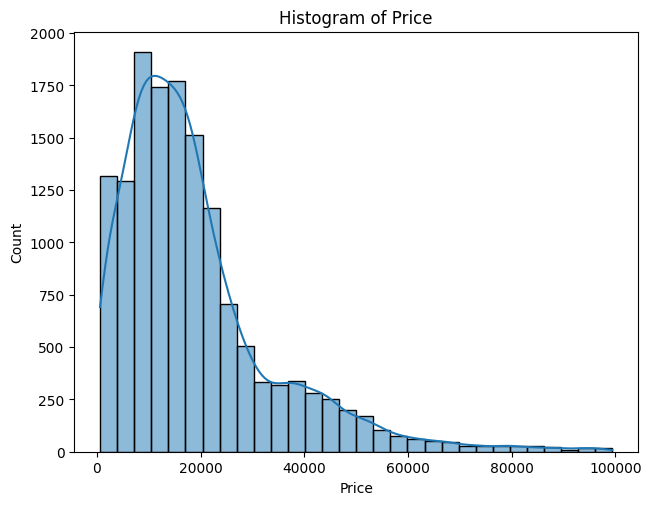

In [42]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 2)

price_limit_low = 0
price_limit_high = 100000 
# Limit the price to zoom in on the most common prices
dfLimited = df[(df['Price'] >= price_limit_low) & (df['Price'] <= price_limit_high)]

sns.histplot(dfLimited['Price'], bins=30, kde=True)
plt.title('Histogram of Price')

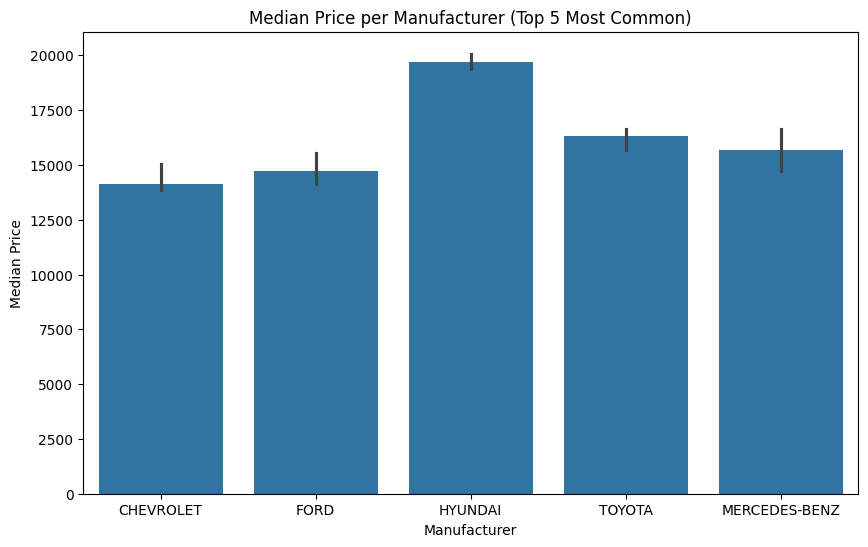

In [43]:
top_manufacturers = df['Manufacturer'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 6))
sns.barplot(x='Manufacturer', y='Price', data=df[df['Manufacturer'].isin(top_manufacturers)], estimator='median')
plt.title('Median Price per Manufacturer (Top 5 Most Common)')
plt.xlabel('Manufacturer')
plt.ylabel('Median Price')
plt.show()

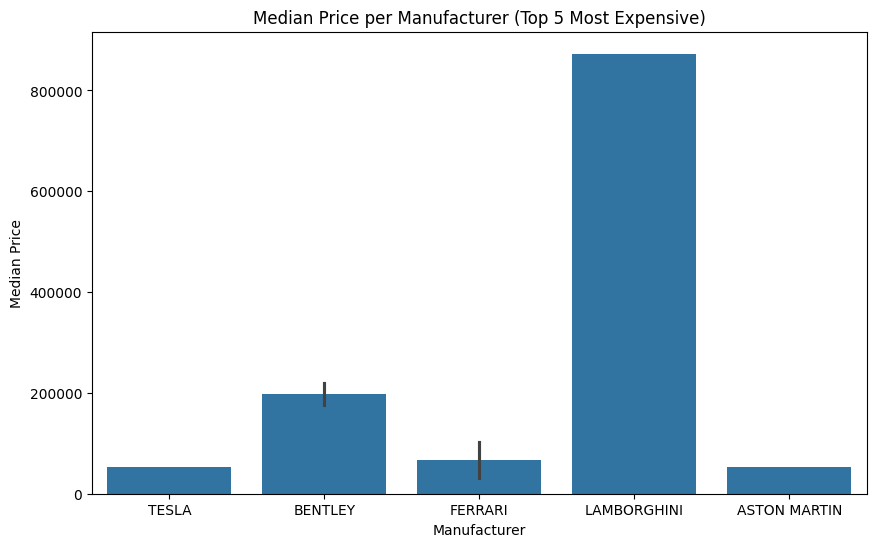

In [44]:
top_expensive_manufacturers = df.groupby('Manufacturer')['Price'].median().nlargest(5).index
plt.figure(figsize=(10, 6))
sns.barplot(x='Manufacturer', y='Price', data=df[df['Manufacturer'].isin(top_expensive_manufacturers)], estimator='median')
plt.title('Median Price per Manufacturer (Top 5 Most Expensive)')
plt.xlabel('Manufacturer')
plt.ylabel('Median Price')
plt.show()

In [45]:
top_expensive_cars = df.nlargest(1, 'Price')
selected_columns = ['Manufacturer', 'Model', 'Price', 'Prod. year', 'Fuel type']
print(top_expensive_cars.loc[:, selected_columns])

     Manufacturer Model   Price  Prod. year Fuel type
6764  LAMBORGHINI  Urus  872946        2019    Petrol


In [46]:
df = df.map(lambda x: x.upper() if isinstance(x, str) else x) # Make all letters full capital, for encoding
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Airbags
0,13328,1399,LEXUS,RX 450,2010,JEEP,YES,HYBRID,3.5,186005,6,AUTOMATIC,4X4,4,12
1,16621,1018,CHEVROLET,EQUINOX,2011,JEEP,NO,PETROL,3,192000,6,TIPTRONIC,4X4,4,8
2,8467,0,HONDA,FIT,2006,HATCHBACK,NO,PETROL,1.3,200000,4,VARIATOR,FRONT,4,2
3,3607,862,FORD,ESCAPE,2011,JEEP,YES,HYBRID,2.5,168966,4,AUTOMATIC,4X4,4,0
4,11726,446,HONDA,FIT,2014,HATCHBACK,YES,PETROL,1.3,91901,4,AUTOMATIC,FRONT,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14462,8781,1107,OPEL,COMBO,2007,GOODS WAGON,NO,DIESEL,1.7 TURBO,236000,4,MANUAL,FRONT,4,4
14463,7840,0,NISSAN,SKYLINE,2003,SEDAN,YES,PETROL,3,220000,6,TIPTRONIC,REAR,4,0
14464,8467,0,MERCEDES-BENZ,CLK 200,1999,COUPE,YES,CNG,2.0 TURBO,300000,4,MANUAL,REAR,2,5
14465,15681,831,HYUNDAI,SONATA,2011,SEDAN,YES,PETROL,2.4,161600,4,TIPTRONIC,FRONT,4,8


In [51]:
df['Fuel type'].unique()

array(['HYBRID', 'PETROL', 'DIESEL', 'CNG', 'PLUG-IN HYBRID', 'LPG',
       'HYDROGEN'], dtype=object)

In [47]:
from sklearn.preprocessing import OrdinalEncoder
import pickle

categoricalColumns = df.select_dtypes(include=['object']).columns.tolist()
df[categoricalColumns] = df[categoricalColumns].astype(str)
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encodedData = encoder.fit_transform(df[categoricalColumns])
df[categoricalColumns] = encodedData.astype(int)

with open('encoder.pkl', 'wb') as encoder_file: # Save the encoder for later usage in the interface
    pickle.dump(encoder, encoder_file)

df.head()

NameError: name 'stop' is not defined

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
correlation_matrix = df.corr()
price_correlations = correlation_matrix['Price'].drop('Price')
print("Correlations with Price: ")
print(price_correlations)

sorted_correlations = price_correlations.abs().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, hue=sorted_correlations.index, palette="viridis", legend=False)
plt.title('Correlations with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coeff')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
]

In [ ]:
predictions = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((model_name, y_pred))
    

for model_name, y_pred in predictions:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    print('--------------------------')

In [ ]:
for model_name, y_pred in predictions:
    fig = plt.figure(figsize=(17, 10))
    plt.title(f"Prediction with {model_name}")
    
    mask = y_test < 100000 # limit to zoom in more on the most common prices
    
    plt.scatter(np.where(mask)[0], y_test[mask], color='red', label='Real')
    plt.scatter(np.where(mask)[0], y_pred[mask], marker='*', label='Predict')
    
    plt.legend(loc=2, prop={'size': 25})
    plt.show()

In [ ]:
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_jobs=5)
param_grid = { # hyperparameters
    'n_estimators': [50, 100, 200], # number of trees in the forest to consider
    'max_depth': [25, 50, 100], # maximum depth of the tree
    'min_samples_split': [2, 5, 10], # minimum number of samples before splitting
    'min_samples_leaf': [1, 2, 3], # minimum number of samples required to be at a leaf node
    'max_features': [25, 50, 100] # number of features to consider when looking for the best split
}
param_combinations = list(product(*param_grid.values()))

# variables to keep track of the best parameters and the corresponding score
best_params = None
best_score = float('-inf')
best_predictions = None

for params in param_combinations:
    # set the hyperparameters for the model
    model.set_params(**dict(zip(param_grid.keys(), params)))
    # fit the model
    model.fit(X_train, y_train)
    # predicting on the test data
    y_pred_test = model.predict(X_test)
    # evaluate using r2 regression metric
    r2 = r2_score(y_test, y_pred_test)
    # update best parameters and score if the current model is better
    if r2 > best_score:
        best_score = r2
        best_params = model.get_params()
        best_predictions = y_pred_test

print("Best Parameters: ", best_params)
print("Best R2 Score: ", best_score)

In [ ]:
# retrain the model with the best parameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# export the best model
import joblib
joblib.dump(best_model, 'RF_model.joblib')

In [ ]:
inputData = {
    'Levy': 0,
    'Manufacturer': 'NISSAN',
    'Model': 'SKYLINE',
    'Prod. year': 2020,
    'Category': 'SPORT',
    'Leather interior': 'YES',
    'Fuel type': 'PETROL',
    'Engine volume': '5',
    'Mileage': 0,
    'Cylinders': 6,
    'Gear box type': 'MANUAL',
    'Drive wheels': 'REAR',
    'Doors': '4',
    'Airbags': 4
}
customData = pd.DataFrame([inputData])

with open('encoder.pkl', 'rb') as encoder_file:
    loaded_encoder = pickle.load(encoder_file)

customData[categoricalColumns] = customData[categoricalColumns].astype(str)
customEncodedData = loaded_encoder.transform(customData[categoricalColumns])
customData[categoricalColumns] = customEncodedData.astype(int)

customData

In [ ]:
custom_prediction = best_model.predict(customData)

# Display the predicted price
print("\nPredicted Price for Custom Input Data:")
print(custom_prediction)